In [1]:
import os, sys
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
dataset_path = Path.cwd().parent / Path("data/dataset/moving_mnist/mnist_test_seq.npy")
videos = np.load(str(dataset_path))
videos.shape # (T, N, H, W)

(20, 10000, 64, 64)

In [3]:
def to_sequence(video, horizontally=True):
    """Convert a video to an image with frames horizontally aligned

    :param np.ndarray video: video (dim=5, axis=(video_len, height, width, channel))
    :param bool horizontally: whether concatenate horizontally or not (vertically)
    """
    # write video
    t, y, x, ch = video.shape
    
    axis = horizontally and 1 or 0
    seq_image = video[0]
    for i in range(1, t):
        seq_image = np.concatenate((seq_image, video[i]), axis=axis)

    return seq_image

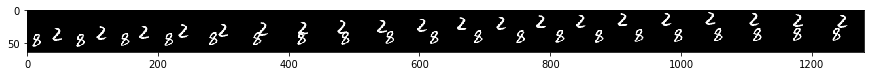

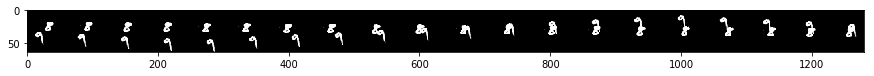

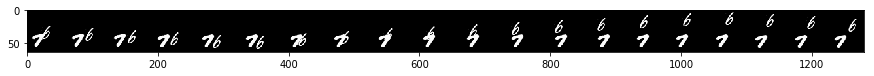

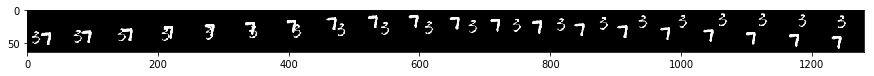

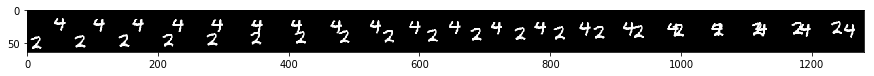

In [4]:
videos = videos.transpose(1, 0, 2, 3)
videos = np.tile(videos[:,:,:,:,None], (1,1,1,1,3))
N, T, H, W, C = videos.shape

for rand in np.random.randint(N, size=5):
    plt.figure(figsize=(15,15))
    plt.imshow(to_sequence(videos[rand]))
    plt.show()

In [6]:
videos.max(), videos.min(), videos.mean()

(255, 0, 12.564001059570312)